# FoodHub Data Analysis

**Context**

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.


**Objective**

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

**Data Description**

The data contains information related to food orders. Below is the detailed **Data Dictionary**.

**Data Dictionary**

- **order_id**: Unique ID of the order
- **customer_id**: ID of the customer who placed the food order
- **restaurant_name**: Name of the restaurant from which the food was ordered
- **cuisine_type**: Type of cuisine ordered by the customer
- **cost**: Total cost of the order
- **day_of_the_week**: Indicates whether the order was placed on a weekday or weekend (Weekdays: Monday to Friday and Weekend: Saturday and Sunday)
- **rating**: Rating given by the customer for the food or service, out of 5
- **food_preparation_time**: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by the difference between the timestamps of Restaurant's order confirmation and the delivery person's pick-up confirmation
- **delivery_time**: Time (in minutes) taken by the delivery person to deliver the food. This is calculated by the difference between the timestamps of Delivery person's pick-up confirmation and the delivery person's drop-off confirmation.


**Importing the required libraries**

In [33]:
# Importing the libraries
import pandas as pd
import numpy as np

In [34]:
# Installing seaborn (this step may not be necessary if seaborn is already installed)
import piplite
await piplite.install('seaborn')

# Importing the necessary libraries
import matplotlib.pyplot as plt

# Displaying plots inline in Jupyter/Colab notebooks
import seaborn as sns
%matplotlib inline

**Understanding the structure of the data**

In [35]:
# Reading the Dataset
df = pd.read_csv("foodhub_order.csv")
df.head() # Returns the first 5 rows of the DataFrame by default

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


**Observations:**

The DataFrame has 9 columns. Data in each row corresponds to the order placed by a customer.

- restaurant_name contains the name of the the restaurant for which the ordered was placed
- cuisine_type describes the type of food ordered
- rating is for each individual order
- The variables order_id, customer_id, cost_of_the_order, food_preparation_time, and delivery_time are numerical
- The variables restaurant_name, cuisine_type, day_of_the_week, and rating are categorical



In [36]:
# The following command returns the number of rows and columns in the DataFrame 'df'.
# It is useful to quickly check the size of your dataset.

df.shape  # Returns a tuple (number_of_rows, number_of_columns)

(1898, 9)

In [37]:
# Getting the total number of elements in the DataFrame
df.size

17082

**Data Exploration**

Let's first have a descriptive exploration on our data.


In [38]:
# The following command generates descriptive statistics for all the numerical columns in the DataFrame 'df'
# It helps you quickly summarize the distribution and central tendency of the data.

df.describe()  # Returns summary statistics for numerical columns in the DataFrame

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [39]:
# The following command provides a summary of the DataFrame 'df'.
# It includes the column names, data types, and the number of non-null entries for each column.

df.info()  # Returns a summary of the DataFrame, including column data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 103.9+ KB


**Observations:**

There are a total of 1898 entries/observations and 9 columns/features in the dataset.

There is 3 different data types:

1. **float64(1):**
   -      cost_of_the_order
2. **int64(4):**
   -      order_id, customer_id, food_preparation_time, delivery_time
3. **object(4):**
   -      restaurant_name, cuisine_type, day_of_the_week, rating

A memory usage of 133.6+ KB.


In [40]:
# Getting the count of unique values in the 'rating' column
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

In [41]:
# Getting the number of unique values in the 'order_id' column
df['order_id'].nunique()

1898

In [42]:
# Getting the number of unique values in the 'customer_id' column
df['customer_id'].nunique()

1200

In [43]:
# Getting the number of unique values in the 'restaurant_name' column
df['restaurant_name'].nunique()

178

In [44]:
# Getting the count of unique values in the 'restaurant_name' column
df['restaurant_name'].value_counts()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

In [45]:
# Getting the count of unique values in the 'cuisine_type' column
df["cuisine_type"].value_counts()

cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64

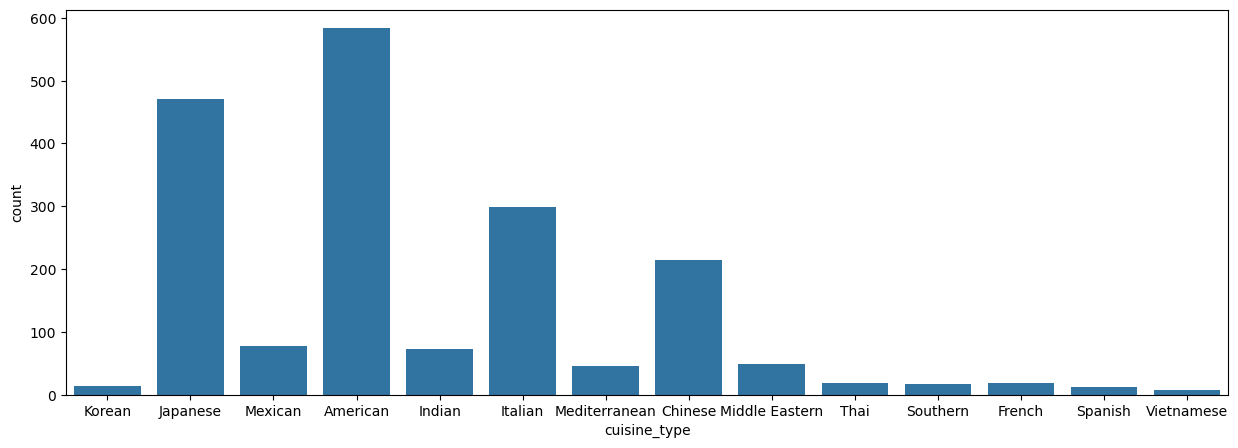

In [46]:
# Setting the figure size
plt.figure(figsize = (15, 5))

# Creating the count plot for 'cuisine_type' column
sns.countplot(data = df, x = "cuisine_type")

# Showing the plot
plt.show()

In [47]:
# Getting the count of unique values in the 'day_of_the_week' column
df["day_of_the_week"].value_counts()

day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64

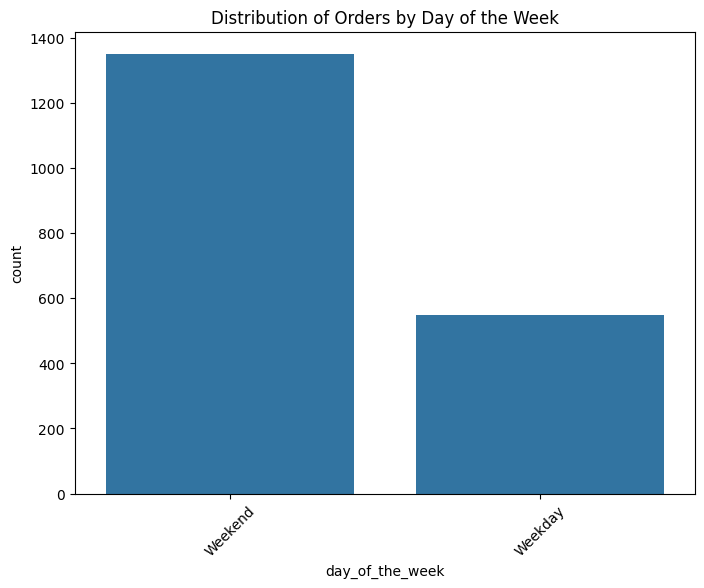

In [74]:
# Creating a count plot for the 'day_of_the_week' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="day_of_the_week")

# Showing the plot
plt.title("Distribution of Orders by Day of the Week")
plt.xticks(rotation=45)
plt.show()


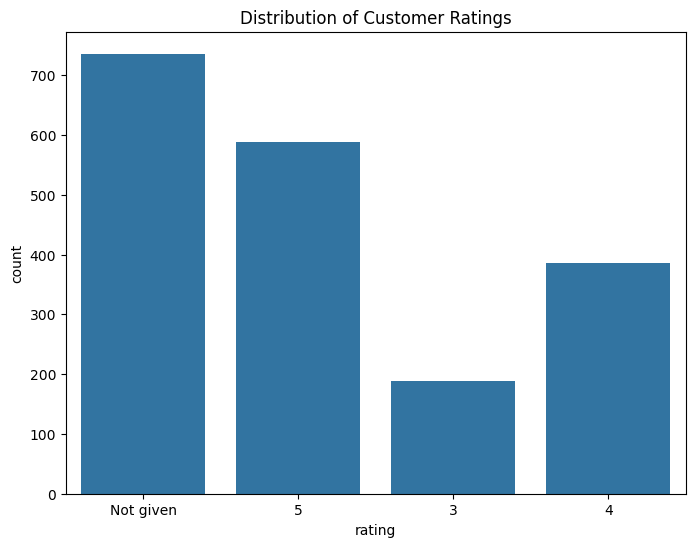

In [73]:
# Creating a count plot for the 'rating' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="rating")

# Showing the plot
plt.title("Distribution of Customer Ratings")
plt.show()

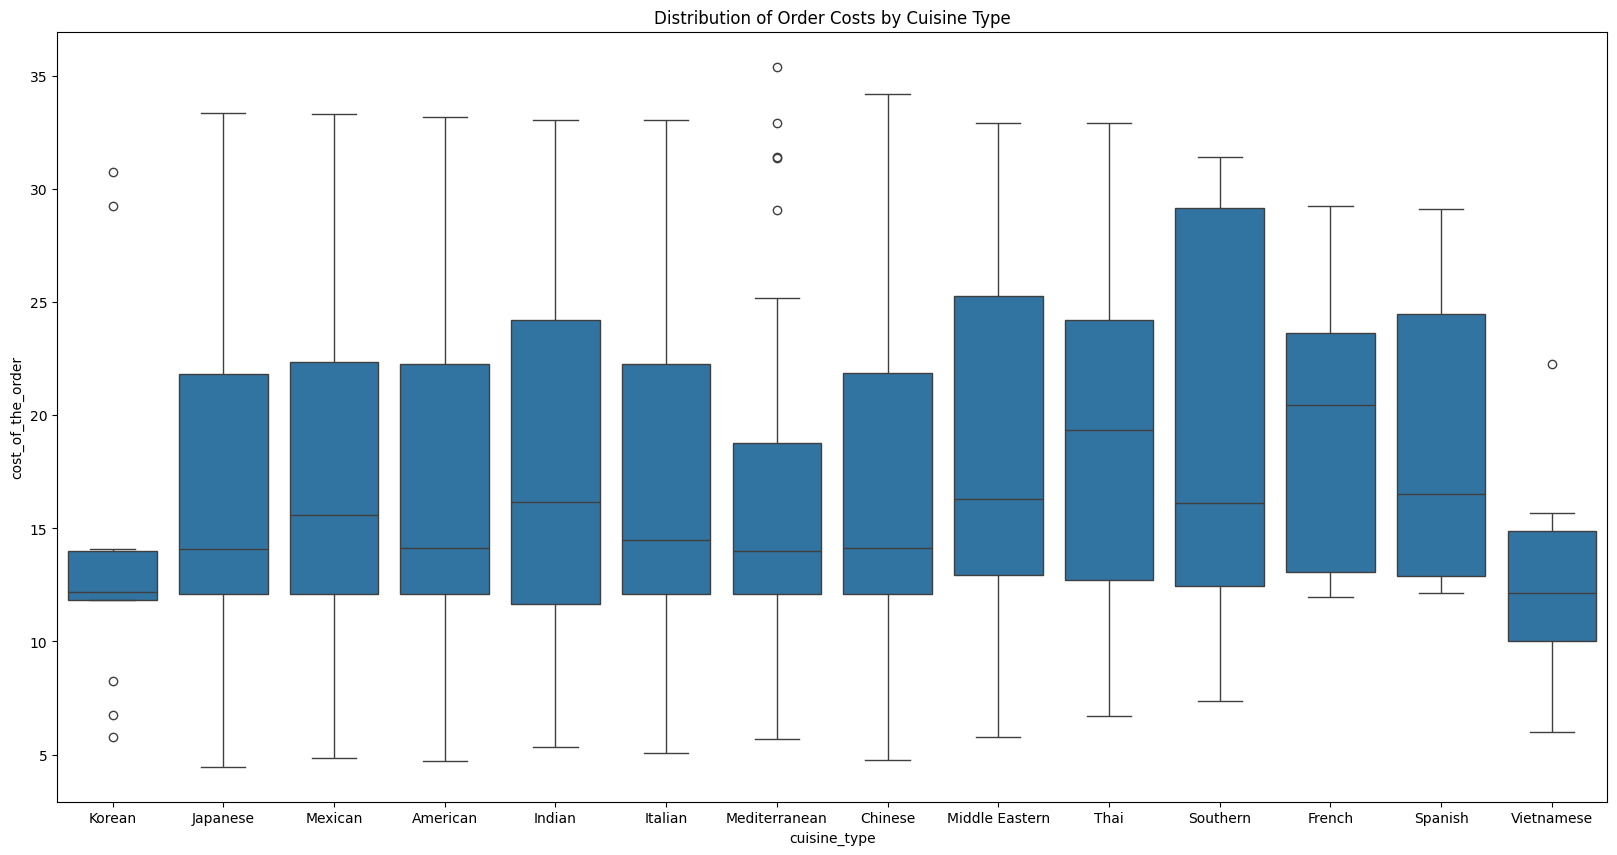

In [75]:
# Setting the figure size
plt.figure(figsize=(20, 10))

# Creating a box plot to visualize the distribution of 'cost_of_the_order' by 'cuisine_type'
sns.boxplot(data=df, x="cuisine_type", y="cost_of_the_order")

# Showing the plot
plt.title("Distribution of Order Costs by Cuisine Type")
plt.show()

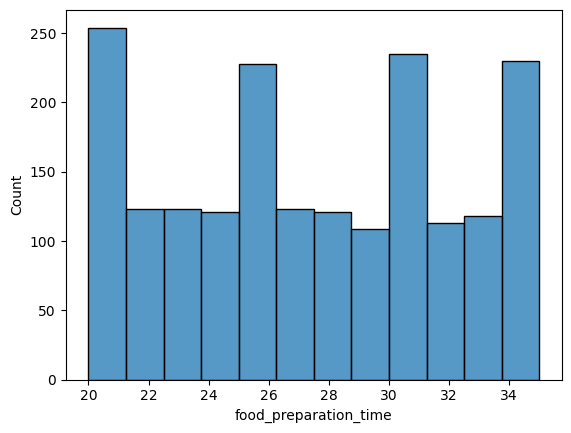

In [52]:
# Creating the histogram for 'food_preparation_time' column
sns.histplot(data=df, x='food_preparation_time')

# Showing the plot
plt.show()


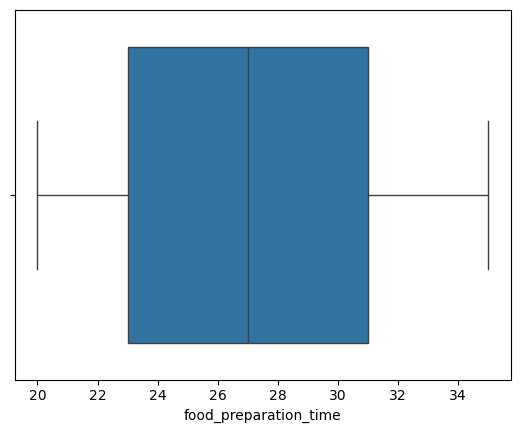

In [53]:
# Creating the box plot for 'food_preparation_time' column
sns.boxplot(data=df, x='food_preparation_time')

# Showing the plot
plt.show()

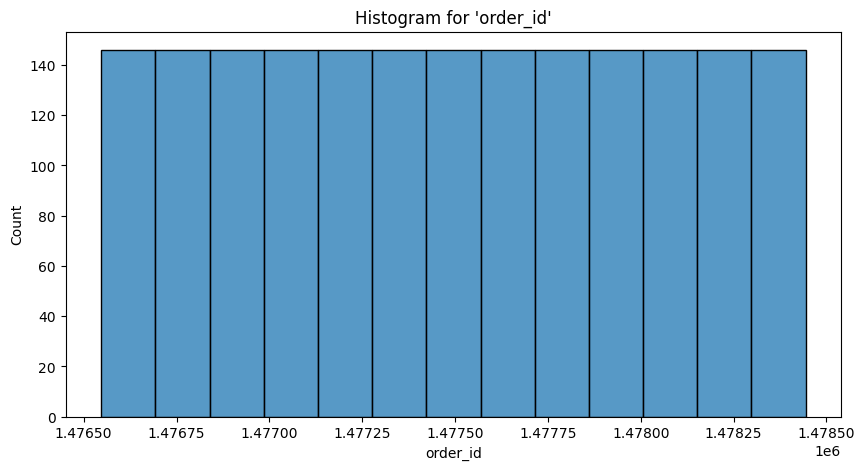

In [54]:
# Creating the histogram for 'order_id' column
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='order_id')
plt.title("Histogram for 'order_id'")
plt.show()


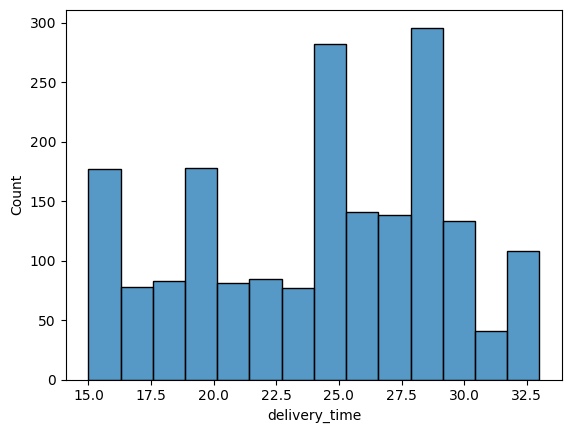

In [55]:
# Creating the histogram for 'delivery_time' column
sns.histplot(data=df, x='delivery_time')

# Showing the plot
plt.show()

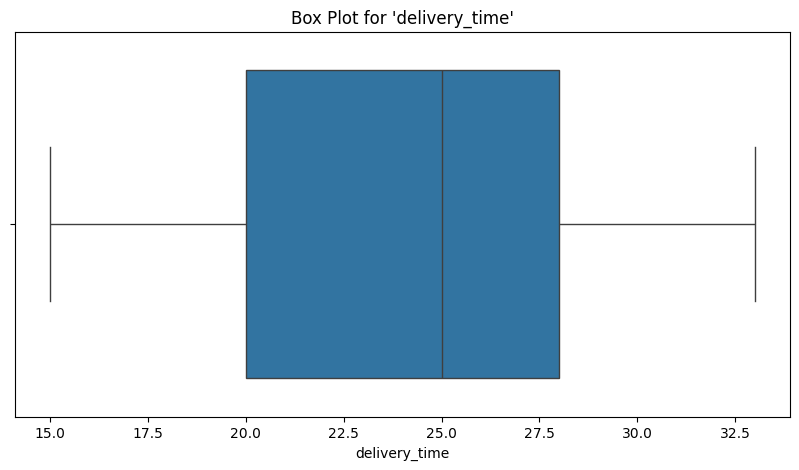

In [56]:
# Creating the box plot for 'delivery_time' column
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='delivery_time')
plt.title("Box Plot for 'delivery_time'")
plt.show()

In [57]:
# Getting the top 5 most frequent 'restaurant_name' values
print(df["restaurant_name"].value_counts()[:5])


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


In [58]:
# Filter the DataFrame for 'Weekend' days in the 'day_of_the_week' column
db = df[df["day_of_the_week"] == "Weekend"]

# Displaying the filtered DataFrame
print(db)

      order_id  customer_id                        restaurant_name  \
0      1477147       337525                                Hangawi   
1      1477685       358141              Blue Ribbon Sushi Izakaya   
3      1477334       106968              Blue Ribbon Fried Chicken   
6      1477894       157711                      The Meatball Shop   
11     1478437       221206                 Empanada Mama (closed)   
...        ...          ...                                    ...   
1891   1476981       138586                            Shake Shack   
1892   1477473        97838                            Han Dynasty   
1893   1476701       292602  Chipotle Mexican Grill $1.99 Delivery   
1894   1477421       397537                              The Smile   
1897   1478056       120353                      Blue Ribbon Sushi   

     cuisine_type  cost_of_the_order day_of_the_week     rating  \
0          Korean              30.75         Weekend  Not given   
1        Japanese        

In [59]:
# Countting the frequency(regular) of each 'cuisine_type' in the filtered DataFrame
db["cuisine_type"].value_counts()

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

In [60]:
# Getting the number of rows in the DataFrame
df.shape[0]

1898

In [61]:
# Calculating the percentage of total rows in the DataFrame
myvar = (df.shape[0] / df.shape[0]) * 100

# Printing the result
print(myvar)

100.0


In [62]:
# Round the value of myvar to 2 decimal places
rounded_value = round(myvar, 2)

# Printing the rounded value
print(rounded_value)


100.0


In [63]:

# Calculating the mean of 'delivery_time' and round it to 2 decimal places
delivery_time = round(df["delivery_time"].mean(), 2)

# Printing the rounded mean delivery time
print(delivery_time)


24.16


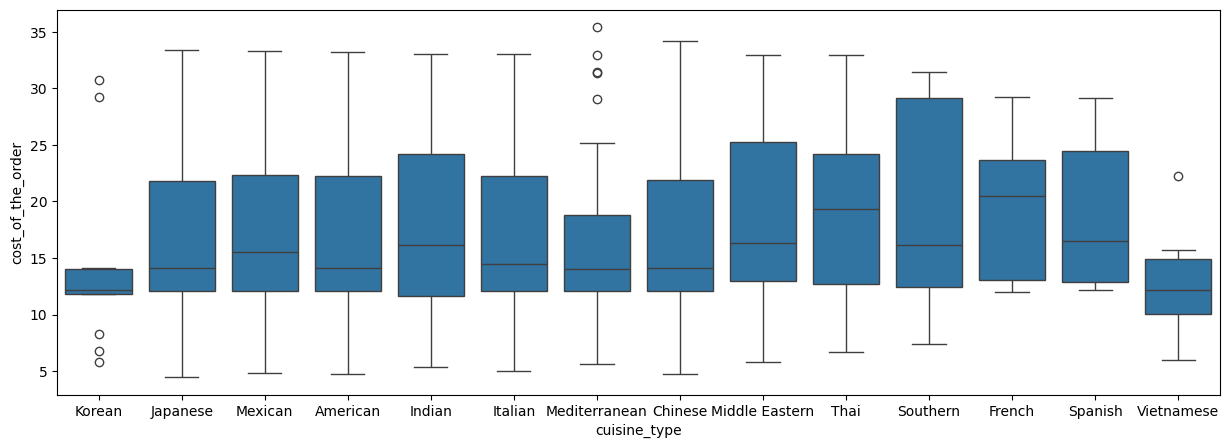

In [64]:
# Setting the figure size
plt.figure(figsize=(15, 5))

# Creating the box plot for 'cuisine_type' and 'cost_of_the_order'
sns.boxplot(x="cuisine_type", y="cost_of_the_order", data=df)

# Showing the plot
plt.show()


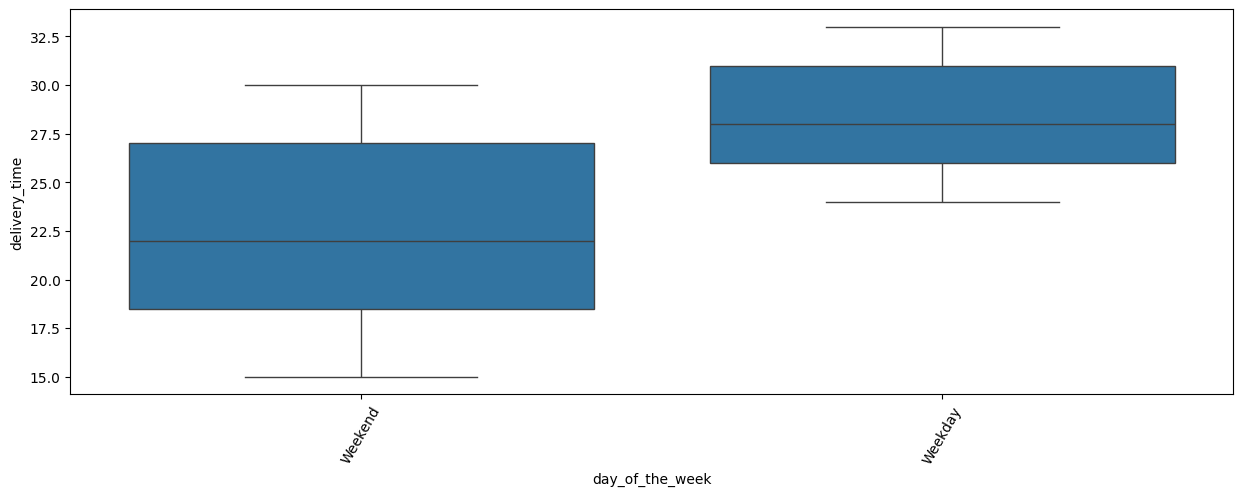

In [65]:
# setting the figure size
plt.figure(figsize =(15,5))

# Creating the box plot for 'day_of_the_week' and 'delivery_time'
sns.boxplot(x="day_of_the_week", y="delivery_time", data=df)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=60)

# Showing the plot
plt.show()


In [66]:

# Grouping by 'restaurant_name', sum 'cost_of_the_order', sort by total cost, and show the top 10
top_10_restaurants = df.groupby(["restaurant_name"])["cost_of_the_order"].sum().sort_values(ascending=False).head(10)

# Displaying the result
print(top_10_restaurants)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Name: cost_of_the_order, dtype: float64


In [67]:
# Define the list of columns to include
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

In [68]:
# Calculating and displaying the correlation matrix
df[col_list].corr()

,cost_of_the_order,food_preparation_time,delivery_time
cost_of_the_order,1.000000,0.041527,-0.029949
food_preparation_time,0.041527,1.000000,0.011094
delivery_time,-0.029949,0.011094,1.000000


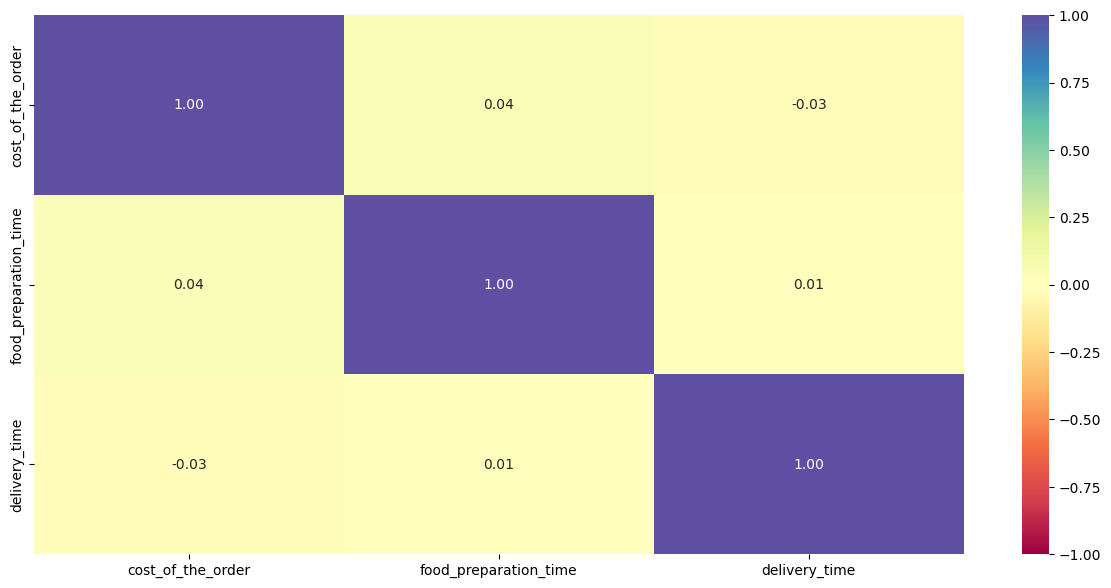

In [69]:
# setting the figure size
plt.figure(figsize=(15, 7))
# Creating the heatmap for the correlation matrix of the selected columns
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

# Showing the plot
plt.show()

In [70]:
# Filtering out rows where the 'rating' is 'Not given' and creating a copy
df_rating = df[df['rating'] != "Not given"].copy()

# Displaying the filtered DataFrame
print(df_rating)


      order_id  customer_id                        restaurant_name  \
2      1477070        66393                            Cafe Habana   
3      1477334       106968              Blue Ribbon Fried Chicken   
4      1478249        76942                       Dirty Bird to Go   
5      1477224       147468                       Tamarind TriBeCa   
7      1477859        89574                              Barbounia   
...        ...          ...                                    ...   
1889   1478190        94152                       RedFarm Broadway   
1890   1477316       164776                                    TAO   
1893   1476701       292602  Chipotle Mexican Grill $1.99 Delivery   
1894   1477421       397537                              The Smile   
1896   1477513        64151                      Jack's Wife Freda   

       cuisine_type  cost_of_the_order day_of_the_week rating  \
2           Mexican              12.23         Weekday      5   
3          American          

In [71]:
# Converting the 'rating' column to integer data type
df_rating['rating'] = df_rating['rating'].astype('int')

# Displaying the modified DataFrame
print(df_rating)


      order_id  customer_id                        restaurant_name  \
2      1477070        66393                            Cafe Habana   
3      1477334       106968              Blue Ribbon Fried Chicken   
4      1478249        76942                       Dirty Bird to Go   
5      1477224       147468                       Tamarind TriBeCa   
7      1477859        89574                              Barbounia   
...        ...          ...                                    ...   
1889   1478190        94152                       RedFarm Broadway   
1890   1477316       164776                                    TAO   
1893   1476701       292602  Chipotle Mexican Grill $1.99 Delivery   
1894   1477421       397537                              The Smile   
1896   1477513        64151                      Jack's Wife Freda   

       cuisine_type  cost_of_the_order day_of_the_week  rating  \
2           Mexican              12.23         Weekday       5   
3          American        

In [72]:
# Group by 'restaurant_name', count the 'rating' entries, and sort by count
df_rating_count = df_rating.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()

# Displaying the top 10 restaurants by rating count
print(df_rating_count.head(10))


             restaurant_name  rating
0                Shake Shack     133
1          The Meatball Shop      84
2          Blue Ribbon Sushi      73
3  Blue Ribbon Fried Chicken      64
4           RedFarm Broadway      41
5                       Parm      39
6             RedFarm Hudson      34
7                        TAO      28
8                   Rubirosa      24
9             Nobu Next Door      23


### Conclusion for FoodHub Market Analysis

The **FoodHub Market Analysis** provides valuable insights into the food delivery service based on customer orders, restaurant performance, and delivery efficiency. Key findings include:

- **Restaurant Demand**: Popular restaurants and cuisines were identified, highlighting customer preferences.
- **Delivery Efficiency**: Delivery and food preparation times were analyzed, revealing potential areas for operational improvement, especially during peak days (weekends).
- **Customer Satisfaction**: Ratings reflect customer satisfaction, helping identify top-performing restaurants and areas that may need improvement.

By leveraging these insights, FoodHub can optimize **delivery operations**, enhance **restaurant partnerships**, and improve **customer experience** to drive business growth.
